In [1]:
# necessary imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [2]:
k = pd.read_csv('../input/ckdisease/kidney_disease.csv')
k

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
# loading data

df= pd.read_csv('../input/ckdisease/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

In [5]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [6]:
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [7]:
df['albumin'].unique()

array([ 1.,  4.,  2.,  3.,  0., nan,  5.])

In [8]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [10]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [12]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [13]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [14]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [15]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [16]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



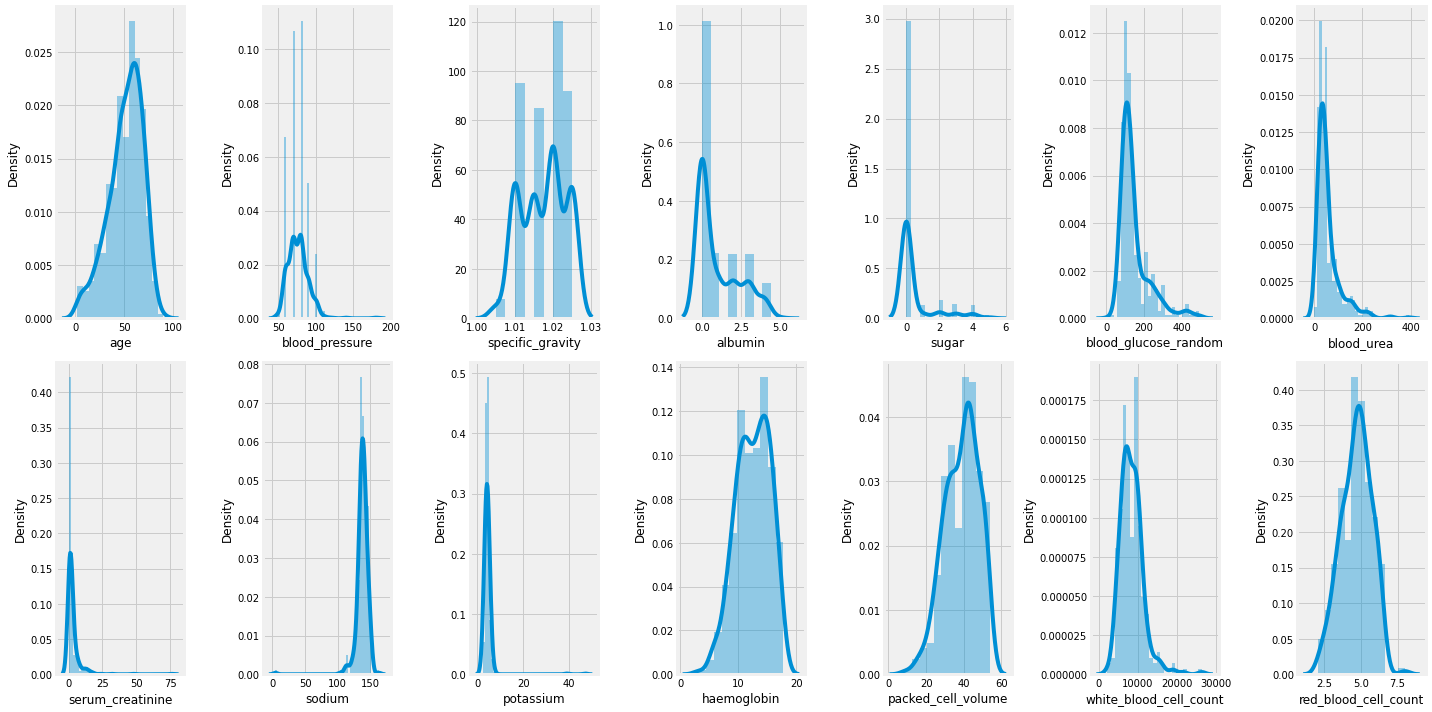

In [17]:
# checking numerical features distribution

plt.figure(figsize = (20, 10))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(2, 7, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

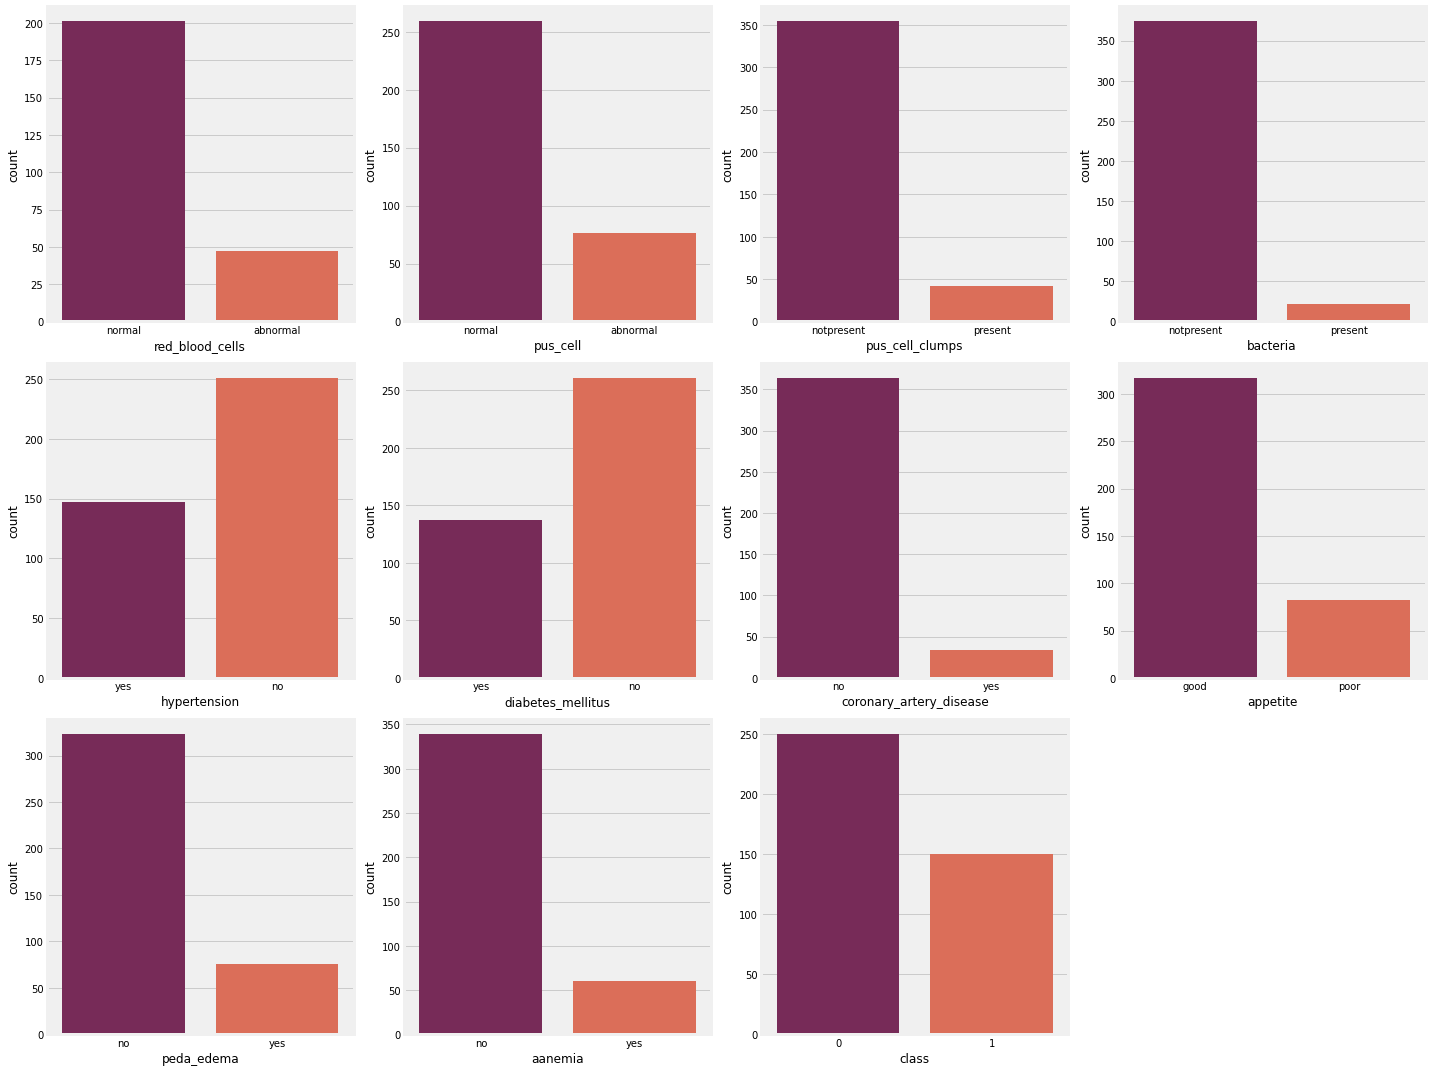

In [18]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

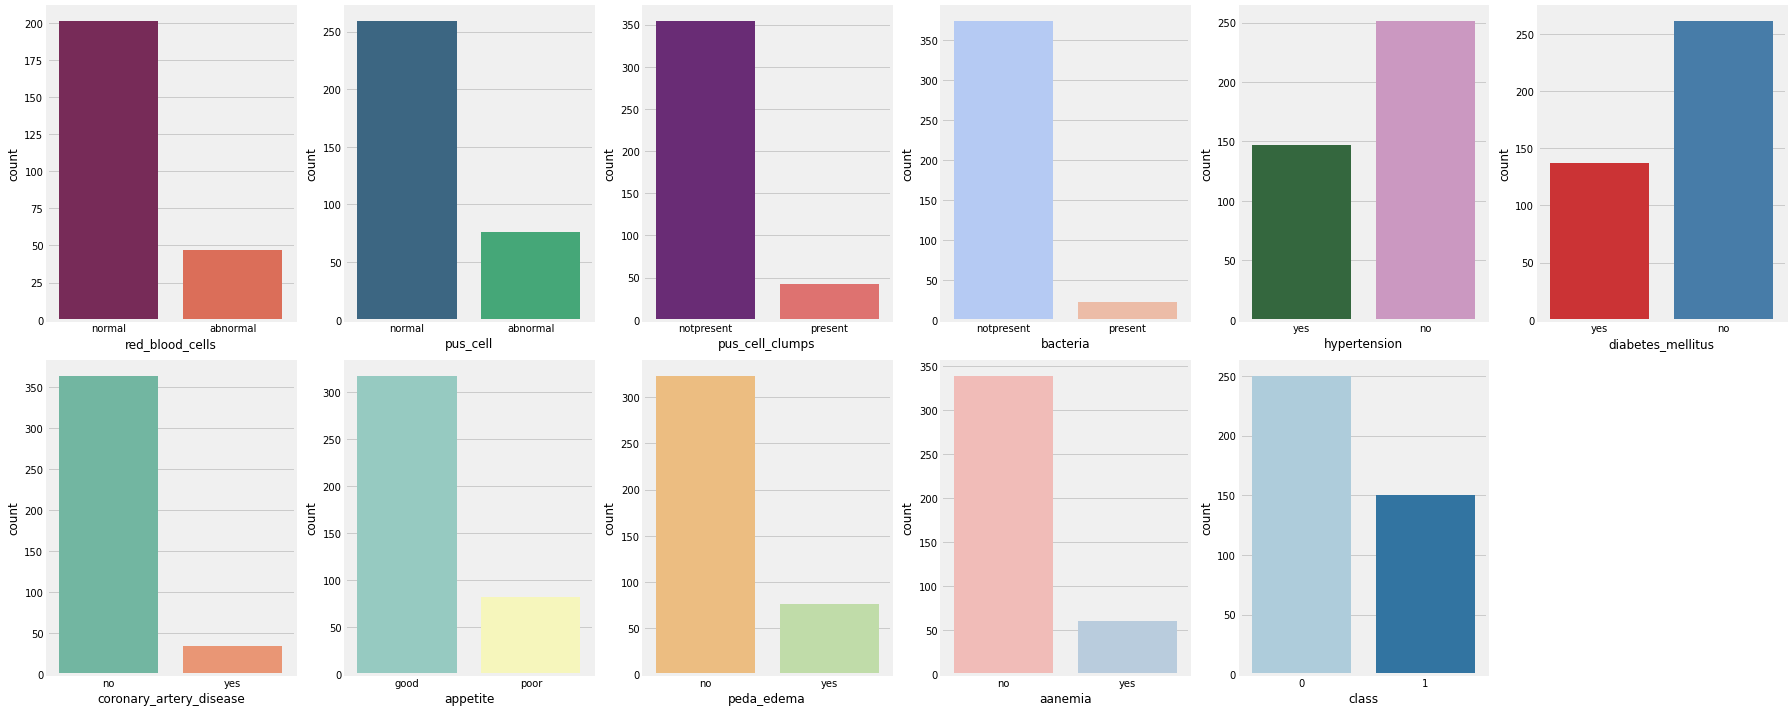

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of different color palettes
palettes = ['rocket', 'viridis', 'magma', 'coolwarm', 'cubehelix', 'Set1', 'Set2', 'Set3', 'Spectral', 'Pastel1', 'Paired']

plt.figure(figsize=(25, 10))
plotnumber = 1

for column, palette in zip(cat_cols, palettes):
    if plotnumber <= 11:
        ax = plt.subplot(2, 6, plotnumber)
        sns.countplot(df[column], palette=palette)
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()


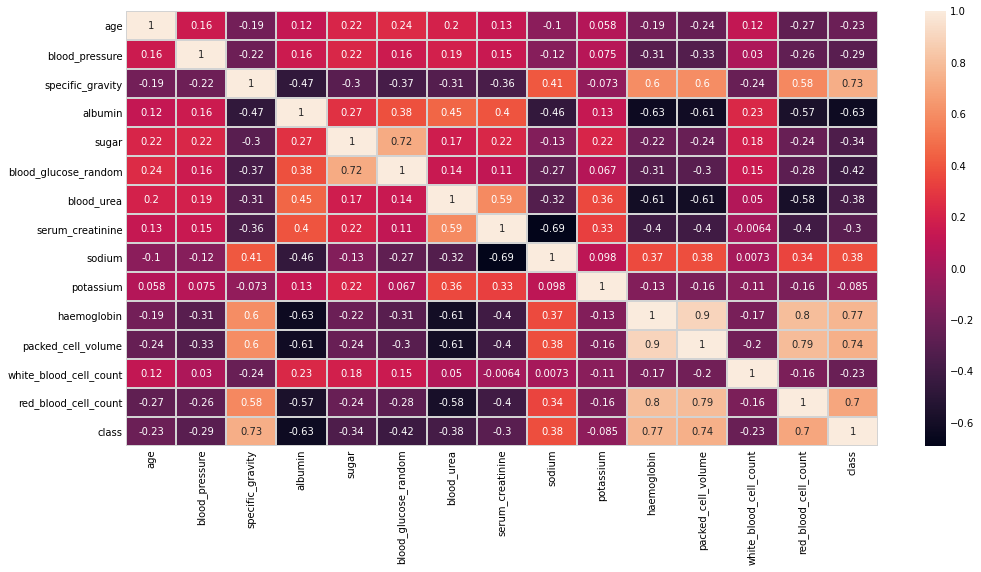

In [20]:
# heatmap of data

plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [21]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [22]:
# defining functions to create plot

def violin(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(df, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="class", template = 'plotly_dark')
    return fig.show()

In [23]:
violin('red_blood_cell_count')

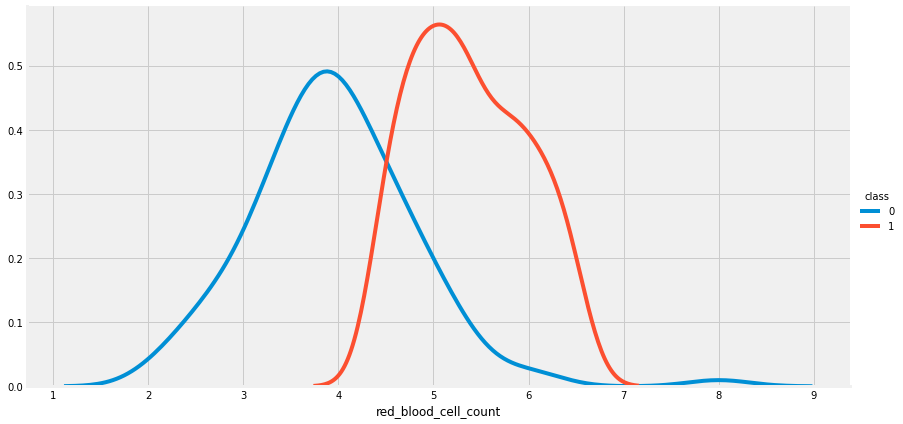

In [24]:
kde('red_blood_cell_count')

In [25]:
violin('white_blood_cell_count')

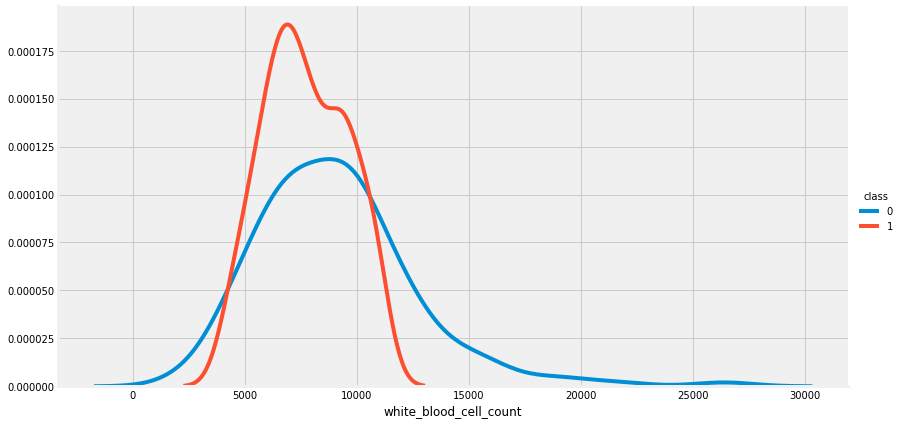

In [26]:
kde('white_blood_cell_count')

In [27]:
violin('packed_cell_volume')

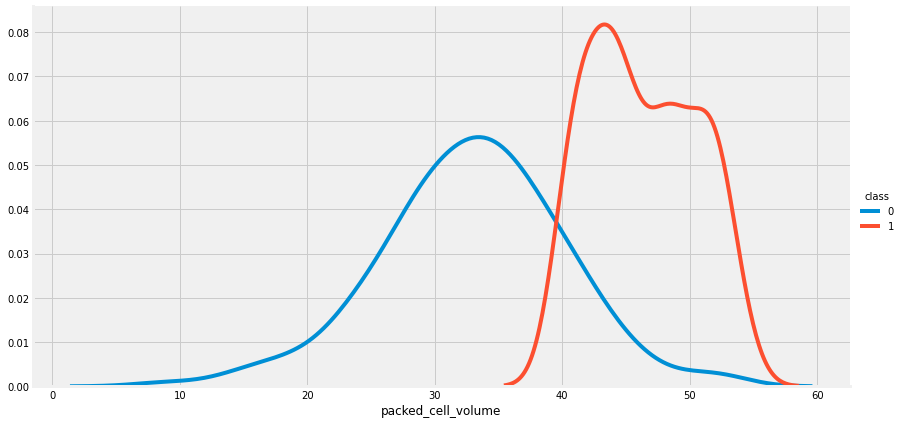

In [28]:
kde('packed_cell_volume')

In [29]:
violin('haemoglobin')

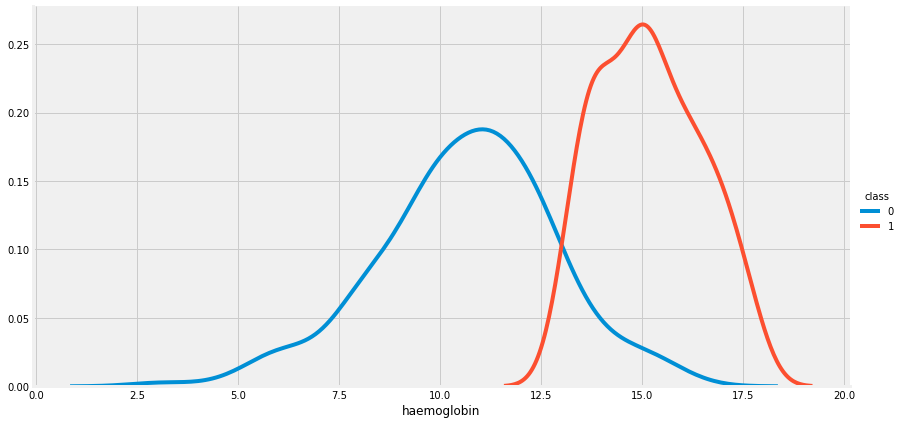

In [30]:
kde('haemoglobin')

In [31]:
violin('albumin')

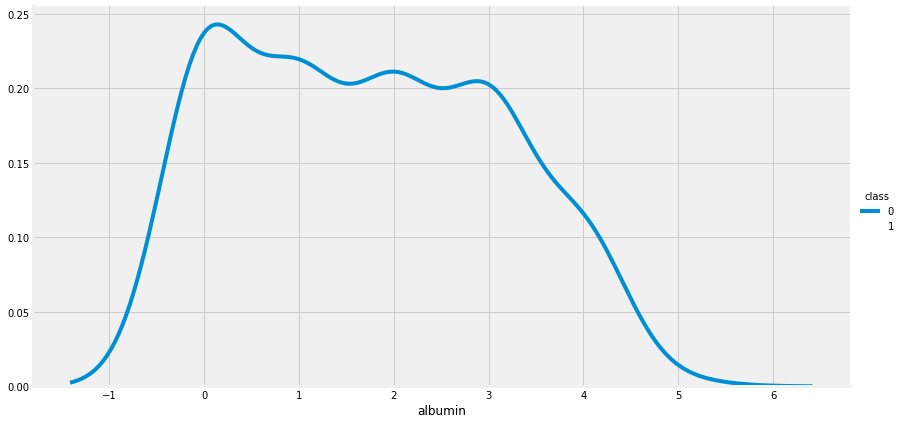

In [32]:
kde('albumin')

In [33]:
violin('blood_glucose_random')

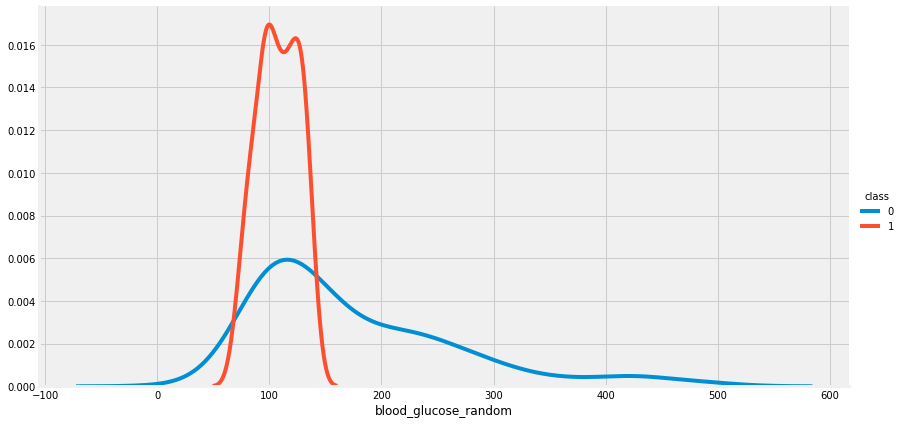

In [34]:
kde('blood_glucose_random')

In [35]:
violin('sodium')

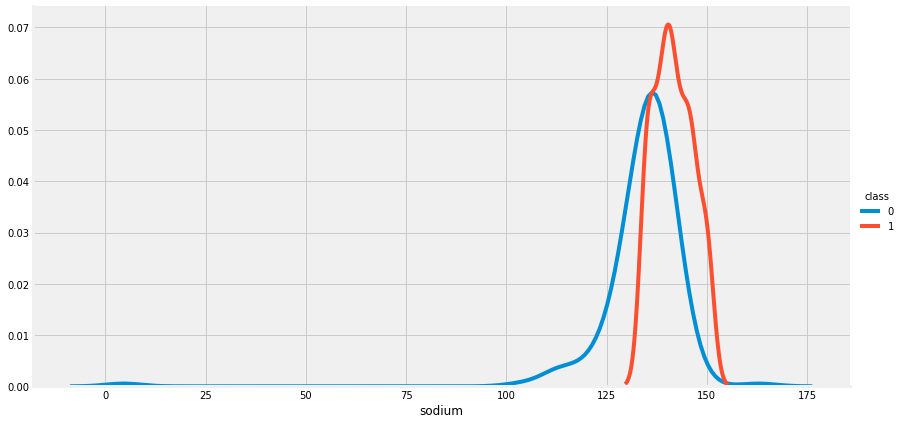

In [36]:
kde('sodium')

In [37]:
violin('blood_urea')

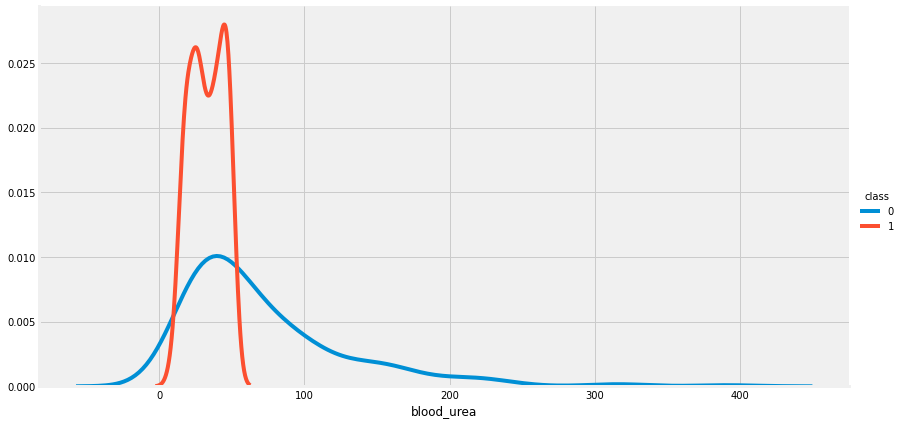

In [38]:
kde('blood_urea')

In [39]:
violin('specific_gravity')

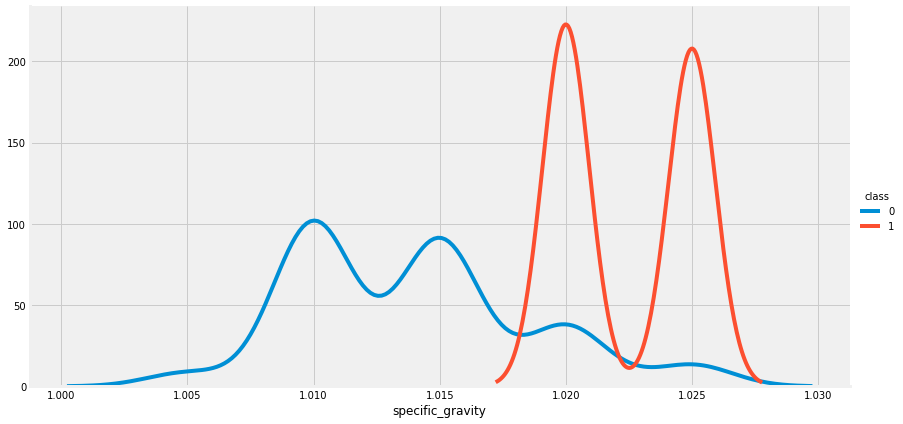

In [40]:
kde('specific_gravity')

In [41]:
scatter('haemoglobin', 'packed_cell_volume')

In [42]:
scatter('red_blood_cell_count', 'packed_cell_volume')

In [43]:
scatter('red_blood_cell_count', 'albumin')

In [44]:
scatter('sugar', 'blood_glucose_random')

In [45]:
scatter('packed_cell_volume','blood_urea')

In [46]:
px.bar(df, x="specific_gravity", y="packed_cell_volume", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [47]:
px.bar(df, x="specific_gravity", y="albumin", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [48]:
px.bar(df, x="blood_pressure", y="packed_cell_volume", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [49]:
px.bar(df, x="blood_pressure", y="haemoglobin", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [50]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [51]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [52]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [53]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [54]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [55]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [56]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [57]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [58]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [60]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,36.0,1.2,141.0,4.9,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,123.0,18.0,0.8,134.0,4.7,11.3,38.0,6000.0,5.0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,136.0,4.4,9.6,31.0,7500.0,4.7,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,132.0,3.4,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [61]:
df.to_csv('final_kideny.csv')

In [62]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,36.0,1.2,141.0,4.9,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,123.0,18.0,0.8,134.0,4.7,11.3,38.0,6000.0,5.0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,136.0,4.4,9.6,31.0,7500.0,4.7,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,132.0,3.4,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,0,0,0,1


In [63]:
import pandas as pd

# Assuming df is your DataFrame
unique_values = {col: df[col].unique() for col in df.columns}

unique_values_summary = pd.DataFrame([(k, len(v), v[:10]) for k, v in unique_values.items()], 
                                     columns=['Column', 'Number of Unique Values', 'Sample Unique Values'])

# Display the DataFrame directly
display(unique_values_summary)



,Column,Number of Unique Values,Sample Unique Values
0,age,76,"[48.0, 7.0, 62.0, 51.0, 60.0, 68.0, 24.0, 52.0..."
1,blood_pressure,10,"[80.0, 50.0, 70.0, 90.0, 100.0, 60.0, 110.0, 1..."
2,specific_gravity,5,"[1.02, 1.01, 1.005, 1.015, 1.025]"
3,albumin,6,"[1.0, 4.0, 2.0, 3.0, 0.0, 5.0]"
4,sugar,6,"[0.0, 3.0, 4.0, 1.0, 2.0, 5.0]"
5,red_blood_cells,2,"[0, 1]"
6,pus_cell,2,"[1, 0]"
7,pus_cell_clumps,2,"[0, 1]"
8,bacteria,2,"[0, 1]"
9,blood_glucose_random,146,"[121.0, 123.0, 423.0, 117.0, 106.0, 74.0, 100...."


In [64]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [65]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.7714285714285715
Test Accuracy of KNN is 0.6666666666666666 

Confusion Matrix :- 
[[51 21]
 [19 29]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.73      0.71      0.72        72
           1       0.58      0.60      0.59        48

    accuracy                           0.67       120
   macro avg       0.65      0.66      0.66       120
weighted avg       0.67      0.67      0.67       120



In [67]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.95 

Confusion Matrix :- 
[[69  3]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.94      0.94      0.94        48

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



In [68]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 4492 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:   16.4s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [69]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'}
0.9892857142857142


In [70]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9642857142857143
Test Accuracy of Decision Tree Classifier is 0.9166666666666666 

Confusion Matrix :- 
[[66  6]
 [ 4 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        72
           1       0.88      0.92      0.90        48

    accuracy                           0.92       120
   macro avg       0.91      0.92      0.91       120
weighted avg       0.92      0.92      0.92       120



In [71]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.9583333333333334 

Confusion Matrix :- 
[[71  1]
 [ 4 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.98      0.92      0.95        48

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



In [72]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")

Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 0.9666666666666667 

Confusion Matrix :- 
[[71  1]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.98      0.94      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120



Training Accuracy: 1.0
Test Accuracy: 0.9666666666666667


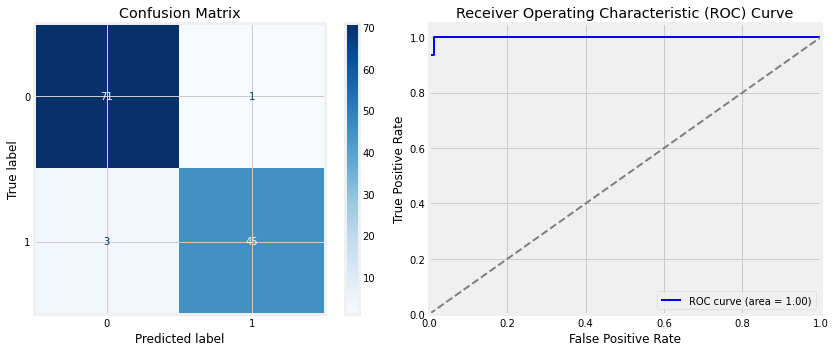

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.98      0.94      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120



In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, plot_confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier



# Accuracy score
ada_acc = ada.score(X_test, y_test)
print(f"Training Accuracy: {ada.score(X_train, y_train)}")
print(f"Test Accuracy: {ada_acc}")

# Confusion Matrix
y_pred = ada.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# AUC-ROC Curve
y_prob = ada.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting Confusion Matrix and AUC-ROC together
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot Confusion Matrix
plot_confusion_matrix(ada, X_test, y_test, cmap=plt.cm.Blues, ax=ax[0])
ax[0].set_title('Confusion Matrix')

# Plot AUC-ROC Curve
ax[1].plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC) Curve')
ax[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


In [74]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.9666666666666667 

Confusion Matrix :- 
[[71  1]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.98      0.94      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120



In [75]:
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 0.9666666666666667 

Confusion Matrix :- 
[[71  1]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.98      0.94      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120



In [76]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

[02:44:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.9666666666666667 

Confusion Matrix :- 
[[71  1]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.98      0.94      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120



In [77]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)

Learning rate set to 0.408198
0:	learn: 0.2543419	total: 60.1ms	remaining: 541ms
1:	learn: 0.1469161	total: 61.7ms	remaining: 247ms
2:	learn: 0.0849245	total: 63.3ms	remaining: 148ms
3:	learn: 0.0586698	total: 64.9ms	remaining: 97.4ms
4:	learn: 0.0476175	total: 66.5ms	remaining: 66.5ms
5:	learn: 0.0327585	total: 68ms	remaining: 45.3ms
6:	learn: 0.0267737	total: 69.5ms	remaining: 29.8ms
7:	learn: 0.0227733	total: 71ms	remaining: 17.7ms
8:	learn: 0.0181959	total: 72.3ms	remaining: 8.04ms
9:	learn: 0.0155025	total: 73.9ms	remaining: 0us


In [78]:
# accuracy score, confusion matrix and classification report of cat boost

cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

Training Accuracy of Cat Boost Classifier is 1.0
Test Accuracy of Cat Boost Classifier is 0.9666666666666667 

Confusion Matrix :- 
[[71  1]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.98      0.94      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120



In [79]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.9666666666666667 

Confusion Matrix :- 
[[72  0]
 [ 4 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.92      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



In [80]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))

Training Accuracy of LGBM Classifier is 1.0
Test Accuracy of LGBM Classifier is 0.9666666666666667 

[[71  1]
 [ 3 45]]

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.98      0.94      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120



In [94]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Function to calculate sensitivity and specificity
def get_sensitivity_specificity(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

# List of models (already fitted)
models_dict = {
    'KNN': knn,
    'Decision Tree Classifier': dtc,
    'Random Forest Classifier': rd_clf,
    'Ada Boost Classifier': ada,
    'Gradient Boosting Classifier': gb,
    'Stochastic Gradient Boosting': sgb,
    'XgBoost': xgb,
    'Cat Boost': cat,
    'Extra Trees Classifier': etc
}

# Dictionary to store the results
results = []

# Iterate through models and calculate metrics
for model_name, model in models_dict.items():
    # Make predictions using the trained model
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # For AUC
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    sensitivity, specificity = get_sensitivity_specificity(y_test, y_pred)
    
    # Append results to the list
    results.append({
        'Model': model_name,
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'AUC': auc
    })

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Sort by Accuracy (or any other metric)
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)

# Display the results
print(results_df_sorted)


In [85]:
#Imports needed libraries
import numpy as np #linear algebra
import pandas as pd #data manipulation
import matplotlib.pyplot as plt #data viz
from matplotlib.gridspec import GridSpec #data viz
from matplotlib.animation import FuncAnimation #animation
import seaborn as sns #data viz
#data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA #principle component analysis
from IPython.display import HTML #display gif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE #balance classes
import optuna
#models to try out
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import graphviz #graph of model
#metrics
from sklearn import metrics
#shap
import shap
import warnings #warnings
warnings.filterwarnings('ignore') #Hides warning popups

In [86]:
import shap
 
# load JS visualization code to notebook
shap.initjs()

In [87]:
feature_names= X_train.columns

In [88]:
feature_names = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia']

In [89]:
class_names= ['CKD','Non-CKD']

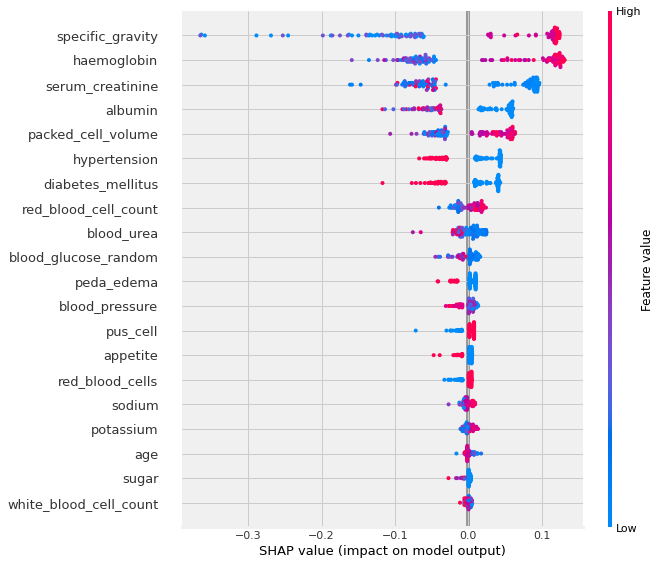

In [90]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(rd_clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values [1], X_test, feature_names=feature_names, class_names=class_names)

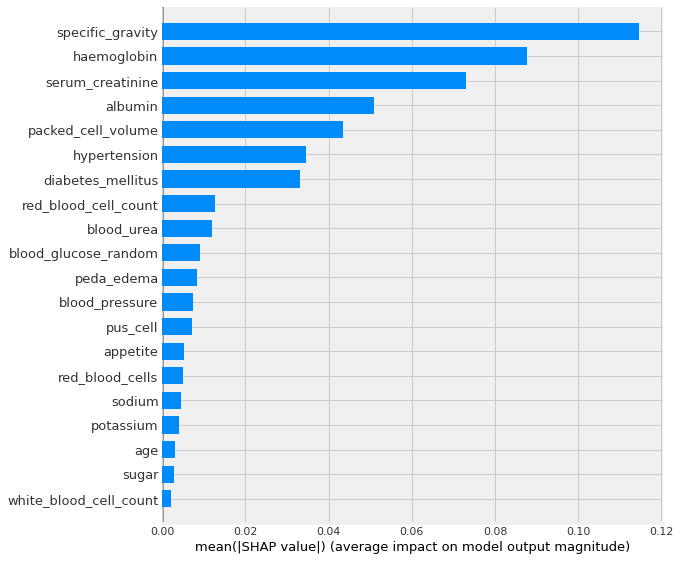

In [91]:
# Create a SHAP explainer for the Random Forest classifier
explainer = shap.TreeExplainer(rd_clf)

# Get SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# If binary classification, select SHAP values for the positive class (class 1)
# For multiclass, you would handle this similarly by indexing based on the class.
shap_values_positive_class = shap_values[1]  # assuming binary classification (class 1 is positive)

# Summary plot using bar plot style (feature names will be displayed automatically)
shap.summary_plot(shap_values_positive_class, X_test, plot_type="bar")

In [92]:
shap.plots.bar(shap_values.abs.max(0))

AttributeError: 'list' object has no attribute 'abs'

In [ ]:
shap.summary_plot(shap_values[0], X_test)

In [ ]:
shap.force_plot(explainer.expected_value [1], shap_values [1][1], X.iloc [1,:])

In [ ]:
import lime
import lime.lime_tabular
 


In [ ]:
#Explain samples in test set
RANDOM_STATE = 123
X_explain = X_test
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train.values,
                                                   feature_names=X_train.columns,
                                                   discretize_continuous=True,
                                                   class_names=class_names,
                                                   mode="classification",
                                                   verbose=True,
                                                   random_state=RANDOM_STATE)


In [ ]:
for i in range(3):
    
    #Explaining first subject in test set using all 30 features
    exp = explainer.explain_instance(X_explain.values[i,:],rd_clf.predict_proba, 
                                     num_features=30)
    #Plot local explanation
    plt = exp.as_pyplot_figure()
    plt.tight_layout()
    exp.show_in_notebook(show_table=True)